# Importing Pandas and numpy for data structure viz DataFrame and numpy to handle null values.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('education_dataset.csv')

# Checking for null values

In [22]:
df.isnull().sum()

Student Name                   0
Class/Grade                    0
Study Hours/Day               22
Attendance %                  23
Exam Score                    27
Favorite Subject              25
Learning Method               11
Smartphone Usage (hrs/day)    29
dtype: int64

In [23]:
(df.isnull().sum()/len(df))*100

Student Name                  0.0
Class/Grade                   0.0
Study Hours/Day               4.4
Attendance %                  4.6
Exam Score                    5.4
Favorite Subject              5.0
Learning Method               2.2
Smartphone Usage (hrs/day)    5.8
dtype: float64

In [24]:
df.describe()

,Study Hours/Day,Attendance %,Exam Score,Smartphone Usage (hrs/day)
count,478.000000,477.000000,473.000000,471.000000
mean,3.616695,79.858323,67.385053,2.695541
std,1.476318,11.468059,18.878596,1.281203
min,1.010000,60.050000,35.090000,0.510000
25%,2.322500,70.150000,51.040000,1.610000
50%,3.620000,80.520000,66.920000,2.610000
75%,4.975000,89.730000,83.740000,3.795000
max,5.990000,99.860000,99.990000,4.990000


In [25]:
df.dtypes

Student Name                   object
Class/Grade                    object
Study Hours/Day               float64
Attendance %                  float64
Exam Score                    float64
Favorite Subject               object
Learning Method                object
Smartphone Usage (hrs/day)    float64
dtype: object

# Handling the missing values using median 

In [26]:
df.loc[(df['Attendance %'] < 0) | (df['Attendance %'] > 100), 'Attendance %'] = np.nan
df.loc[(df['Exam Score'] < 0) | (df['Exam Score'] > 100), 'Exam Score'] = np.nan
df.loc[(df['Smartphone Usage (hrs/day)'] < 0) | (df['Smartphone Usage (hrs/day)'] > 24),'Smartphone Usage (hrs/day)'] = np.nan

df['Attendance %'] = df['Attendance %'].fillna(df['Attendance %'].median())
df['Exam Score'] = df['Exam Score'].fillna(df['Exam Score'].median())
df['Smartphone Usage (hrs/day)'] = df['Smartphone Usage (hrs/day)'].fillna(df['Smartphone Usage (hrs/day)'].median())

# Handling the missing values using mode

In [27]:
df['Favorite Subject'] = df['Favorite Subject'].fillna(df['Favorite Subject'].mode()[0])
df['Learning Method'] = df['Learning Method'].fillna(df['Learning Method'].mode()[0])

In [28]:
num_cols = [
    'Study Hours/Day',
    'Attendance %',
    'Exam Score',
    'Smartphone Usage (hrs/day)'
]
df.describe()

,Study Hours/Day,Attendance %,Exam Score,Smartphone Usage (hrs/day)
count,478.000000,500.000000,500.000000,500.000000
mean,3.616695,79.888760,67.359940,2.690580
std,1.476318,11.201506,18.361051,1.243577
min,1.010000,60.050000,35.090000,0.510000
25%,2.322500,70.487500,51.850000,1.657500
50%,3.620000,80.520000,66.920000,2.610000
75%,4.975000,89.320000,83.200000,3.762500
max,5.990000,99.860000,99.990000,4.990000


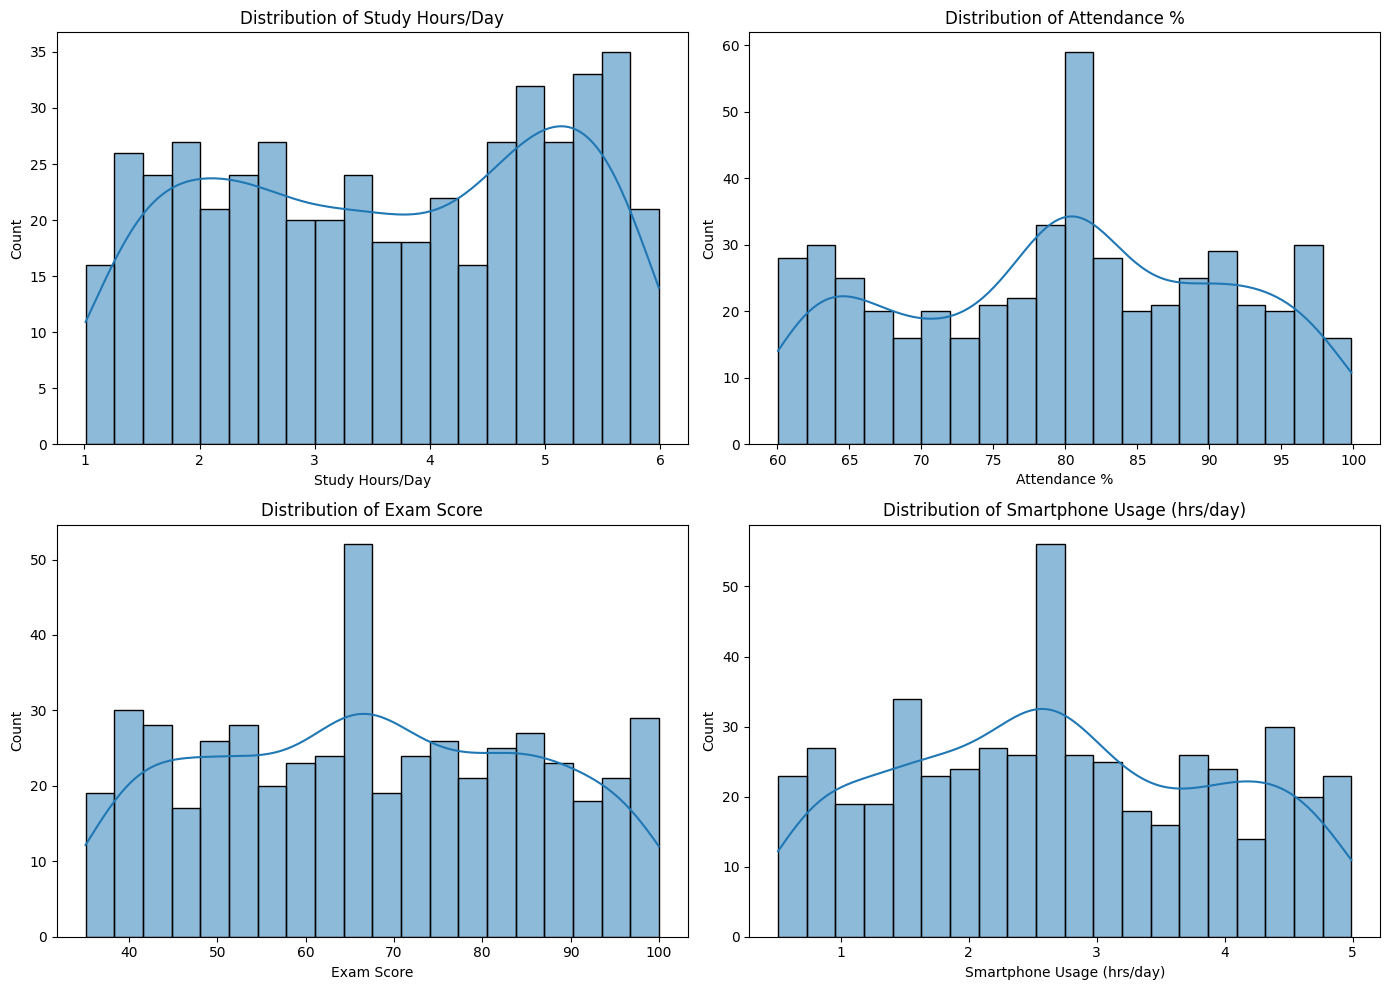

In [29]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# Using Box plot to detect outliers

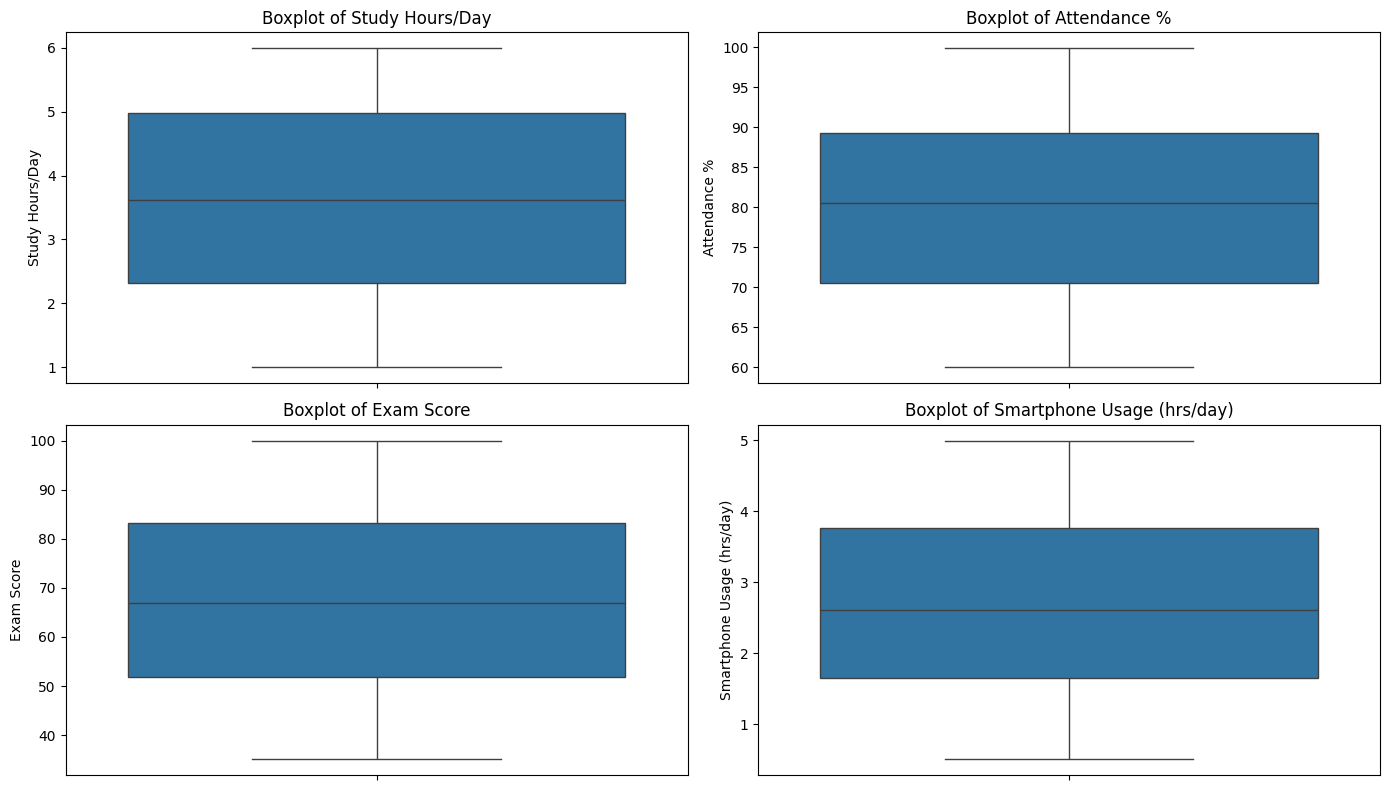

In [30]:

plt.figure(figsize=(14, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Using IQR method to detect the no. of outliers as the Data is skewed 

In [31]:
Q1 = df[num_cols].quantile(0.25)   # 25th percentile
Q3 = df[num_cols].quantile(0.75)   # 75th percentile

IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers_iqr = (df[num_cols] < LB) | (df[num_cols] > UB)

outlier_count = outliers_iqr.sum()

iqr_summary = pd.DataFrame({
    'Q1 (25%)': Q1.round(2),
    'Q3 (75%)': Q3.round(2),
    'IQR': IQR.round(2),
    'Lower Bound': LB.round(2),
    'Upper Bound': UB.round(2),
    'Outlier Count': outlier_count
})

iqr_summary


,Q1 (25%),Q3 (75%),IQR,Lower Bound,Upper Bound,Outlier Count
Study Hours/Day,2.32,4.98,2.65,-1.66,8.95,0
Attendance %,70.49,89.32,18.83,42.24,117.57,0
Exam Score,51.85,83.20,31.35,4.82,130.23,0
Smartphone Usage (hrs/day),1.66,3.76,2.10,-1.50,6.92,0


# Data Scaling
The **Exam Score** variable was scaled using **StandardScaler** to change its scale for better understanding.  
This transformation standardizes the data to have a mean of 0 and a standard deviation of 1.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Exam Score_scaled'] = scaler.fit_transform(df[['Exam Score']])
df.describe()

,Study Hours/Day,Attendance %,Exam Score,Smartphone Usage (hrs/day),Exam Score_scaled
count,478.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,3.616695,79.888760,67.359940,2.690580,-4.676259e-16
std,1.476318,11.201506,18.361051,1.243577,1.001002e+00
min,1.010000,60.050000,35.090000,0.510000,-1.759282e+00
25%,2.322500,70.487500,51.850000,1.657500,-8.455656e-01
50%,3.620000,80.520000,66.920000,2.610000,-2.398450e-02
75%,4.975000,89.320000,83.200000,3.762500,8.635630e-01
max,5.990000,99.860000,99.990000,4.990000,1.778914e+00


In [33]:
df[['Exam Score', 'Exam Score_scaled']].head(10)


,Exam Score,Exam Score_scaled
0,44.00,-1.273529
1,53.48,-0.756702
2,75.08,0.420880
3,83.41,0.875012
4,79.23,0.647128
5,79.19,0.644947
6,81.04,0.745805
7,95.64,1.541763
8,96.79,1.604458
9,92.09,1.348225


In [34]:
df[['Exam Score', 'Exam Score_scaled']].describe()


,Exam Score,Exam Score_scaled
count,500.000000,5.000000e+02
mean,67.359940,-4.676259e-16
std,18.361051,1.001002e+00
min,35.090000,-1.759282e+00
25%,51.850000,-8.455656e-01
50%,66.920000,-2.398450e-02
75%,83.200000,8.635630e-01
max,99.990000,1.778914e+00


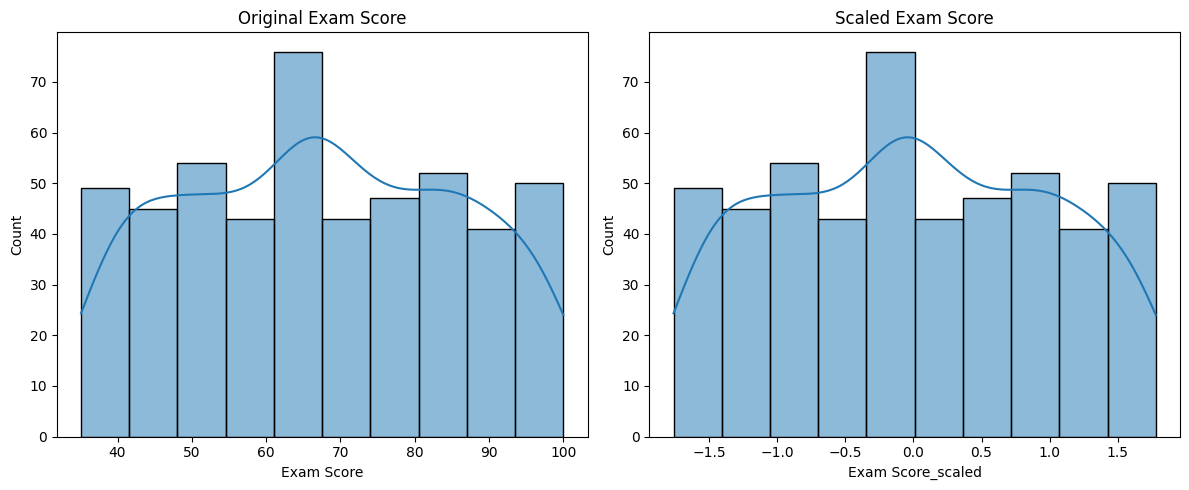

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Exam Score'], kde=True)
plt.title('Original Exam Score')

plt.subplot(1,2,2)
sns.histplot(df['Exam Score_scaled'], kde=True)
plt.title('Scaled Exam Score')

plt.tight_layout()
plt.show()
